In [3]:
import os
import numpy as np 
import cv2 
import matplotlib.pylab as plt

In [4]:
img = cv2.imread('test.png')

In [3]:
def plot_img(im, h=8, **kwargs):
  # Copied from internet to make life a bit easier
  y = im.shape[0]
  x = im.shape[1]
  w = (y/x) * h
  plt.figure(figsize=(w,h))
  plt.imshow(im, interpolation="none", **kwargs)
  plt.axis('off')

In [4]:
def double_size(img):
    x,y,z = img.shape
    temp = np.zeros((x*2,y*2,z))
    for z in range(z):
        for y in range(y):
            for x in range(x):
                temp[x*2:x*4, y*2:y*4,z] = img[x,y,z]
    return temp

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


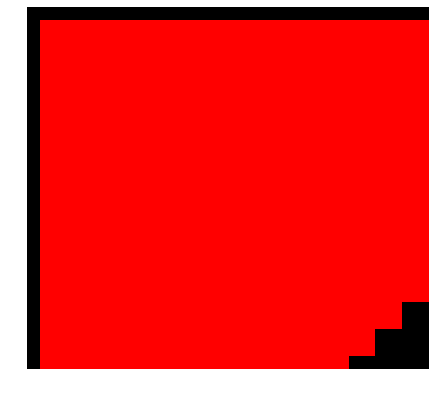

In [5]:
plot_img(double_size(img))

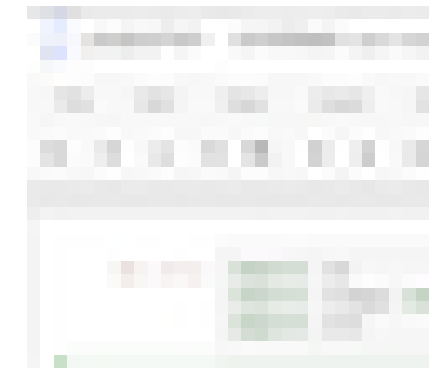

In [6]:

plot_img(img)

In [7]:
def generatePic(x,y):
    myImg = np.zeros((x,y,3))
    h1=myImg.shape[0]
    w1=myImg.shape[1]

    for i in range(int(h1/2)):
        for j in range(int(w1/2),w1):
            myImg[i,j,0]=1
    for i in range(int(h1/2),h1):
        for j in range(int(w1/2)):
            myImg[i,j,0]=1
    return myImg

(16, 16, 3)


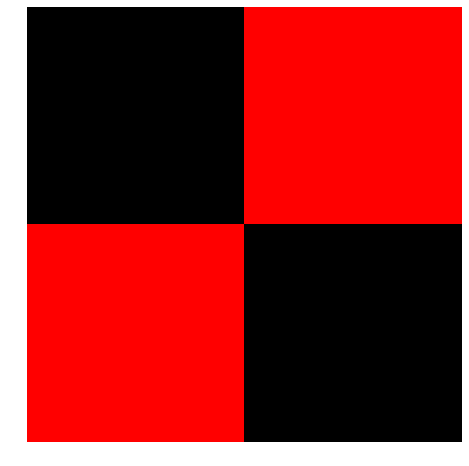

In [8]:
uImg = generatePic(16,16)
print(uImg.shape)
plot_img(uImg)

In [9]:
#uImg = np.reshape(uImg,-1)
#uImg = uImg[::2]
uImg

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
      

In [10]:
j=0
for i in range(0,6):
    print(i,"",j,"",j+1)
    j +=2 
    

0  0  1
1  2  3
2  4  5
3  6  7
4  8  9
5  10  11


In [111]:

def magn_orient(img):
    gx = np.array([])
    gy = np.array([])
    gradient = np.array([])
    orientation = np.array([])
    
    for z in range (img.shape[2]):
        for y in range(img.shape[1]):
            for x in range(img.shape[0]):
                if x == 0:
                    gx = np.append(gx, 0* img[x,y,z] + 1* img[x+1,y,z]) #first element only 1 count
                elif x == img.shape[0]-1:
                    gx = np.append(gx, -1* img[x-1,y,z] + 0* img[x,y,z]) #last element only -1 counts
                    break
                else:
                    gx = np.append(gx, -1* img[x-1,y,z] + 0* img[x,y,z] + 1* img[x+1,y,z]) # applying -1 0 1 filter horizontal
    
    for z in range (img.shape[2]):
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                if y == 0:
                    gy = np.append(gy, 0* img[x,y,z] + 1* img[x,y+1,z]) #first element only 1 count
                elif y == img.shape[0]-1:
                    gy = np.append(gy, -1* img[x,y-1,z] + 0* img[x,y,z]) #last element only -1 counts
                    break
                else:
                    gy = np.append(gy, -1* img[x,y-1,z] + 0* img[x,y,z] + 1* img[x,y+1,z]) # applying -1 0 1 filter vertically
    
    for x in range(gx.shape[0]):
        gradient = np.append(gradient, np.sqrt(np.power(gx[x],2)+np.power(gy[y],2))) #gradient sqrt(gx^2 + gy^2)
        #print(np.arctan(gx[x],gx[y]))
        orientation = np.append(orientation, np.arctan2(gx[x],gy[y])) #generating arctan(gx/gy)
    return gradient , orientation
    
    

In [112]:
magn_orient(img)[0]

array([346.77081769, 235.68835355, 235.        , ..., 235.07658327,
       235.13613078, 339.48490394])

In [146]:
img.resize((27,30,3))

In [1]:
img.shape

NameError: name 'img' is not defined

In [148]:
img

array([[[232, 231, 231],
        [222, 224, 229],
        [213, 216, 228],
        ...,
        [234, 234, 234],
        [236, 236, 236],
        [235, 235, 235]],

       [[255, 255, 255],
        [240, 244, 255],
        [230, 236, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[250, 251, 251],
        [239, 241, 251],
        [239, 241, 250],
        ...,
        [228, 228, 228],
        [214, 214, 214],
        [210, 210, 210]],

       ...,

       [[244, 244, 244],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [246, 246, 246],
        [247, 246, 247],
        [247, 246, 247]],

       [[244, 244, 244],
        [255, 255, 255],
        [255, 254, 255],
        ...,
        [245, 247, 245],
        [245, 246, 245],
        [245, 246, 245]],

       [[245, 245, 245],
        [254, 255, 254],
        [201, 224, 200],
        ...,
        [239, 243, 239],
        [239, 243, 239],
        [239, 243, 239]]

In [128]:
a.resize((3,3))

ValueError: cannot resize an array that references or is referenced
by another array in this way.  Use the resize function

In [34]:
img.shape

(27, 30, 3)

In [36]:
27*30*3

2430

In [49]:
[np.arctan(43/4)]


[1.478040006606753]

In [5]:
img.shape

(27, 30, 3)

In [9]:
img.resize((3,30,27))

In [10]:
img.shape

(3, 30, 27)